In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
data=pd.merge(ride_data,city_data,on="city")
data.head(3)


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban


In [3]:
cityride_data=data.fillna(0)


In [4]:
#avg fare per city
avg_fare_city=cityride_data.groupby(['type',"city"])['fare'].mean()
rural_avg_fare=avg_fare_city.loc["Rural"]
suburban_avg_fare=avg_fare_city.loc["Suburban"]
urban_avg_fare=avg_fare_city.loc["Urban"]


In [5]:

#total_rides_city=cityride_data.groupby('type')['city'].value_counts()
total_rides_city=cityride_data.groupby(['type','city'])['ride_id'].count()
rural_total_rides=total_rides_city.loc["Rural"]
suburban_total_rides=total_rides_city.loc["Suburban"]
urban_total_rides=total_rides_city.loc["Urban"]


In [6]:
drivers_per_city=cityride_data.groupby(['type','city'])['driver_count'].sum()

rural_drivers_city=drivers_per_city.loc["Rural"]
suburban_drivers_city=drivers_per_city.loc["Suburban"]
urban_drivers_city=drivers_per_city.loc["Urban"]





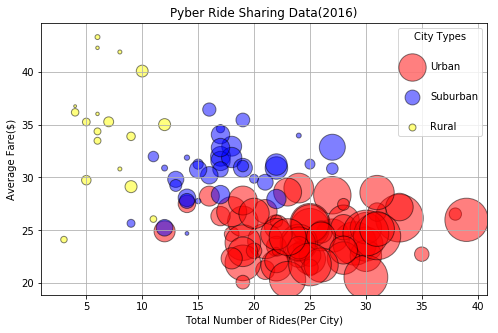

In [7]:
plt.figure(figsize=(8,5))
urban=plt.scatter(urban_total_rides,urban_avg_fare,s=urban_drivers_city,color="red",alpha=.50,edgecolors='black',label="Urban")
suburban=plt.scatter(suburban_total_rides,suburban_avg_fare,s=suburban_drivers_city,color="blue",alpha=.50,edgecolors='black',label="Suburban")
rural=plt.scatter(rural_total_rides,rural_avg_fare,s=rural_drivers_city*2,color="yellow",alpha=.50,edgecolors='black',label="Rural")


plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.title("Pyber Ride Sharing Data(2016)")
plt.grid()

plt.legend(handles=[urban,suburban,rural],labelspacing=2,title="City Types",loc="best",markerscale=0.8)
plt.savefig("scatter1.png")
plt.show()
#plt.savefig("scatter.png")
# have to save file and do analysis

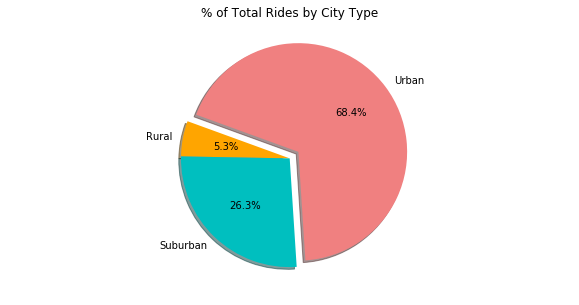

In [8]:
#Pie chart
#total rides by city Type

total_rides_per_city=cityride_data.groupby('type')['city'].count()
plt.figure(figsize=(10,5))
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.pie(total_rides_per_city,labels=["Rural","Suburban","Urban"],colors=['orange','c','lightcoral'],autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],startangle=160)
plt.savefig("pie1.png")
plt.show()



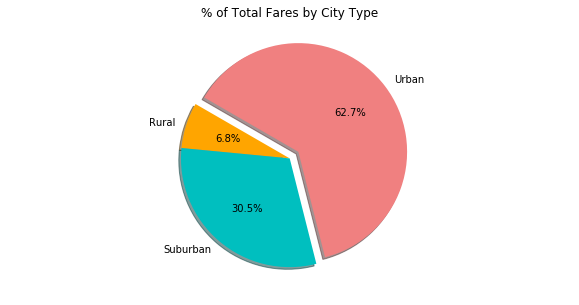

In [9]:
#total fares by city Type

total_fares_per_city=cityride_data.groupby('type')['fare'].sum()
plt.figure(figsize=(10,5))
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.pie(total_fares_per_city,labels=["Rural","Suburban","Urban"],colors=['orange','c','lightcoral'],autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],startangle=150)
plt.savefig("pie2.png")
plt.show()

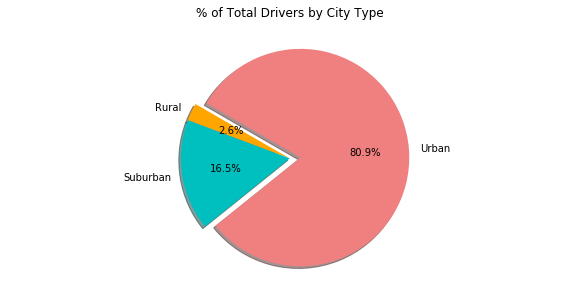

In [10]:
# total drivers per city
drivers_per_city=cityride_data.drop_duplicates(['city']).groupby(['type','city']).agg({'driver_count':'sum'}).reset_index(drop=False)
total_drivers_per_city=drivers_per_city.groupby('type')['driver_count'].sum()
plt.figure(figsize=(10,5))
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers_per_city,labels=["Rural","Suburban","Urban"],colors=['orange','c','lightcoral'],autopct='%0.1f%%',shadow=True,explode=[0,0,0.1],startangle=150)
plt.savefig("pie3.png")
plt.show()




Analysis:
    There are less rides in rural areas but fares are more.Urban rides are more frequent.We dont know the reason why price in rural is high.If its because of driving more miles then organised ride share service from farm to city can be scheduled

#### 